# Muhammad Luqman
## Project Dice(DS-7)

### Problem statement
### ->customers which will CHURN Last week 

### ->3 colunms say analytical dataset bnana hy ->VIDEO main hy


### ->Make it tidy

# >Plan to Solve<
### 1=>Total Sales
### 2=>Sales Count
### 3=>Variance
### 4=>Std
### 5=>Min/Max
### 6=>First visit(overall)
### 7=>Last visit(overall)

### Week 0 (prediction wala)
#### Total Sales,ts>0==CHURN,ts=0Churn=1


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
np.random.seed(seed=25)

In [0]:
data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.csv')
df = data.copy()
df.head()

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,10/18/2014,34810920,205.44
1,9/22/2014,1026037818,51.36
2,9/30/2014,1095693062,222.56
3,10/25/2014,15142688,171.20
4,10/18/2014,1022245368,171.20


In [0]:
df.shape

(1058198, 3)

### Converting Giving date into defined formate so we can Manupilate

In [0]:
# parse arguments
df['Date']=pd.to_datetime(df['SALES_dATE'])
df['Date'].head()

0   2014-10-18
1   2014-09-22
2   2014-09-30
3   2014-10-25
4   2014-10-18
Name: Date, dtype: datetime64[ns]

In [0]:
df['Week_Number']=df.Date.dt.week

In [0]:
df.head()

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT,Date,Week_Number
0,10/18/2014,34810920,205.44,2014-10-18,42
1,9/22/2014,1026037818,51.36,2014-09-22,39
2,9/30/2014,1095693062,222.56,2014-09-30,40
3,10/25/2014,15142688,171.20,2014-10-25,43
4,10/18/2014,1022245368,171.20,2014-10-18,42


In [0]:
temp=df.columns.tolist()
temp=[x.title() for x in temp ]

df.columns=temp
df.drop('Sales_Date',axis=1,inplace=True)
df.head()


,Customer_Id,Sales_Amount,Date,Week_Number
0,34810920,205.44,2014-10-18,42
1,1026037818,51.36,2014-09-22,39
2,1095693062,222.56,2014-09-30,40
3,15142688,171.20,2014-10-25,43
4,1022245368,171.20,2014-10-18,42


In [0]:
df.Week_Number.unique()

array([42, 39, 40, 43, 41, 38])

In [0]:
df.Week_Number.value_counts()

40    205824
41    184040
42    181377
43    179399
39    179380
38    128178
Name: Week_Number, dtype: int64

### Extracted weeks from date now seperating
### ->Customer ->churn and sales
### on the basis of weeks 

In [0]:
df.Customer_Id.unique().shape

(200000,)

In [0]:
df.Week_Number=df.Week_Number.replace([38,39,40,41,42,43],[5,4,3,2,1,0])
df.Week_Number.value_counts()

3    205824
2    184040
1    181377
0    179399
4    179380
5    128178
Name: Week_Number, dtype: int64

### Number of customers which visited the Store more than once

In [0]:
df.head()

,Customer_Id,Sales_Amount,Date,Week_Number
0,34810920,205.44,2014-10-18,1
1,1026037818,51.36,2014-09-22,4
2,1095693062,222.56,2014-09-30,3
3,15142688,171.20,2014-10-25,0
4,1022245368,171.20,2014-10-18,1


In [0]:
weeks=df.groupby(['Customer_Id','Week_Number']).agg({'Sales_Amount':{ 'H_SALES':'sum','H_VISITS':'count','MIN_SALES':'min','MAX_SALES':'max','STD':'std','Variance':'var'}})
weeks.columns=weeks.columns.droplevel()
weeks.reset_index(inplace=True)
weeks.head()


/home/luqman/.local/lib/python3.5/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Customer_Id,Week_Number,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES
0,488,3,171.20,1,171.20,NaN,NaN,171.20
1,5194,2,599.20,1,599.20,NaN,NaN,599.20
2,5398,0,51.36,1,51.36,NaN,NaN,51.36
3,5398,2,51.36,1,51.36,NaN,NaN,51.36
4,5398,4,51.36,1,51.36,NaN,NaN,51.36


In [0]:
weekz=weeks.pivot(index='Customer_Id',columns='Week_Number')
print(weekz.columns)
weekz.head()

MultiIndex(levels=[['MAX_SALES', 'H_VISITS', 'H_SALES', 'STD', 'Variance', 'MIN_SALES'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=[None, 'Week_Number'])


MAX_SALES                                      H_VISITS            \
Week_Number         0      1       2      3       4      5        0    1    2   
Customer_Id                                                                     
488               NaN    NaN     NaN  171.2     NaN    NaN      NaN  NaN  NaN   
5194              NaN    NaN  599.20    NaN     NaN    NaN      NaN  NaN  1.0   
5398            51.36    NaN   51.36    NaN   51.36    NaN      1.0  NaN  1.0   
6930            85.60   85.6  171.20   85.6   85.60    NaN      3.0  1.0  2.0   
7260           171.20  171.2  171.20  256.8  171.20  171.2      2.0  4.0  3.0   

                  ...       Variance                       MIN_SALES         \
Week_Number    3  ...              2        3        4   5         0      1   
Customer_Id       ...                                                         
488          1.0  ...            NaN      NaN      NaN NaN       NaN    NaN   
5194         NaN  ...            NaN      NaN      NaN NaN       NaN    NaN   
5398         NaN  ...            NaN      NaN      NaN NaN     51.36    NaN   
6930         1.0  ...    3663.680000      NaN     0.00 NaN     85.60  85.60   
7260         4.0  ...     390.792533  7327.36  3663.68 NaN     85.60  68.48   

                                          
Week_Number       2      3      4      5  
Customer_Id                               
488             NaN  171.2    NaN    NaN  
5194         599.20    NaN    NaN    NaN  
5398          51.36    NaN  51.36    NaN  
6930          85.60   85.6  85.60    NaN  
7260         136.96   85.6  85.60  171.2  

[5 rows x 36 columns]

In [0]:
weekz.columns=weekz.columns.droplevel()
weekz.head(2)

Week_Number,0,1,2,3,4,5,0,1,2,3,...,2,3,4,5,0,1,2,3,4,5
Customer_Id,,,,,,,,,,,,,,,,,,,,,
488,NaN,NaN,NaN,171.2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
5194,NaN,NaN,599.2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,599.2,NaN,NaN,NaN


In [0]:
weekz.shape

(200000, 36)

In [0]:

weekz.columns=['MAX_SALES0','MAX_SALES1','MAX_SALES2','MAX_SALES3','MAX_SALES4','MAX_SALES5',
    'H_VISITS0','H_VISITS1','H_VISITS2','H_VISITS3','H_VISITS4','H_VISITS5',
        'T_Variance0','T_Variance1','T_Variance2','T_Variance3','T_Variance4','T_Variance5',
        
        'H_SALES0','H_SALES1','H_SALES2','H_SALES3','H_SALES4','H_SALES5',
        'T_STD0','T_STD1','T_STD2','T_STD3','T_STD4','T_STD5',
              'MIN_SALES0','MIN_SALES1','MIN_SALES2','MIN_SALES3','MIN_SALES4','MIN_SALES5',]

weekz.reset_index(inplace=True)
print(weekz.shape)
print(weekz.columns)
weekz.head(2)

(200000, 37)
Index(['Customer_Id', 'MAX_SALES0', 'MAX_SALES1', 'MAX_SALES2', 'MAX_SALES3',
       'MAX_SALES4', 'MAX_SALES5', 'H_VISITS0', 'H_VISITS1', 'H_VISITS2',
       'H_VISITS3', 'H_VISITS4', 'H_VISITS5', 'T_Variance0', 'T_Variance1',
       'T_Variance2', 'T_Variance3', 'T_Variance4', 'T_Variance5', 'H_SALES0',
       'H_SALES1', 'H_SALES2', 'H_SALES3', 'H_SALES4', 'H_SALES5', 'T_STD0',
       'T_STD1', 'T_STD2', 'T_STD3', 'T_STD4', 'T_STD5', 'MIN_SALES0',
       'MIN_SALES1', 'MIN_SALES2', 'MIN_SALES3', 'MIN_SALES4', 'MIN_SALES5'],
      dtype='object')


,Customer_Id,MAX_SALES0,MAX_SALES1,MAX_SALES2,MAX_SALES3,MAX_SALES4,MAX_SALES5,H_VISITS0,H_VISITS1,H_VISITS2,...,T_STD2,T_STD3,T_STD4,T_STD5,MIN_SALES0,MIN_SALES1,MIN_SALES2,MIN_SALES3,MIN_SALES4,MIN_SALES5
0,488,NaN,NaN,NaN,171.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
1,5194,NaN,NaN,599.2,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,599.2,NaN,NaN,NaN


In [0]:
## Data = all weeks excluding last week ->for training and testing data
Data=df[df["Week_Number"]>0].groupby('Customer_Id').agg({'Sales_Amount':{'H_SALES':'sum','H_VISITS':'count','MIN_SALES':'min','MAX_SALES':'max','STD':'std','Variance':'var'},'Date':{'LAST_VISIT':'max','FIRST_VISIT':'min'}})
Data.head()

/home/luqman/.local/lib/python3.5/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Date            Sales_Amount                               \
            FIRST_VISIT LAST_VISIT    MAX_SALES H_VISITS  H_SALES        STD   
Customer_Id                                                                    
488          2014-10-03 2014-10-03       171.20        1   171.20        NaN   
5194         2014-10-09 2014-10-09       599.20        1   599.20        NaN   
5398         2014-09-23 2014-10-07        51.36        2   102.72   0.000000   
6930         2014-09-25 2014-10-15       171.20        6   599.20  34.946054   
7260         2014-09-19 2014-10-19       256.80       14  1968.80  52.950181   

                                    
                Variance MIN_SALES  
Customer_Id                         
488                  NaN    171.20  
5194                 NaN    599.20  
5398            0.000000     51.36  
6930         1221.226667     85.60  
7260         2803.721705     68.48

In [0]:
Data.columns=Data.columns.droplevel()
Data.reset_index(inplace=True)
Data.head()

,Customer_Id,FIRST_VISIT,LAST_VISIT,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES
0,488,2014-10-03,2014-10-03,171.20,1,171.20,NaN,NaN,171.20
1,5194,2014-10-09,2014-10-09,599.20,1,599.20,NaN,NaN,599.20
2,5398,2014-09-23,2014-10-07,51.36,2,102.72,0.000000,0.000000,51.36
3,6930,2014-09-25,2014-10-15,171.20,6,599.20,34.946054,1221.226667,85.60
4,7260,2014-09-19,2014-10-19,256.80,14,1968.80,52.950181,2803.721705,68.48


In [0]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191842 entries, 0 to 191841
Data columns (total 9 columns):
Customer_Id    191842 non-null int64
FIRST_VISIT    191842 non-null datetime64[ns]
LAST_VISIT     191842 non-null datetime64[ns]
MAX_SALES      191842 non-null float64
H_VISITS       191842 non-null int64
H_SALES        191842 non-null float64
STD            146334 non-null float64
Variance       146334 non-null float64
MIN_SALES      191842 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 13.2 MB


In [0]:
final=Data.merge(weekz,on='Customer_Id',how='outer')
print(final.shape)
final.head(2)

(200000, 45)


,Customer_Id,FIRST_VISIT,LAST_VISIT,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES,MAX_SALES0,...,T_STD2,T_STD3,T_STD4,T_STD5,MIN_SALES0,MIN_SALES1,MIN_SALES2,MIN_SALES3,MIN_SALES4,MIN_SALES5
0,488,2014-10-03,2014-10-03,171.2,1.0,171.2,NaN,NaN,171.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
1,5194,2014-10-09,2014-10-09,599.2,1.0,599.2,NaN,NaN,599.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,599.2,NaN,NaN,NaN


In [0]:
final.isnull().sum()

Customer_Id         0
FIRST_VISIT      8158
LAST_VISIT       8158
MAX_SALES        8158
H_VISITS         8158
H_SALES          8158
STD             53666
Variance        53666
MIN_SALES        8158
MAX_SALES0      89431
MAX_SALES1      88812
MAX_SALES2      87265
MAX_SALES3      79858
MAX_SALES4      89495
MAX_SALES5     108301
H_VISITS0       89431
H_VISITS1       88812
H_VISITS2       87265
H_VISITS3       79858
H_VISITS4       89495
H_VISITS5      108301
T_Variance0     89431
T_Variance1     88812
T_Variance2     87265
T_Variance3     79858
T_Variance4     89495
T_Variance5    108301
H_SALES0       156644
H_SALES1       155990
H_SALES2       155380
H_SALES3       148376
H_SALES4       156839
H_SALES5       173180
T_STD0         156644
T_STD1         155990
T_STD2         155380
T_STD3         148376
T_STD4         156839
T_STD5         173180
MIN_SALES0      89431
MIN_SALES1      88812
MIN_SALES2      87265
MIN_SALES3      79858
MIN_SALES4      89495
MIN_SALES5     108301
dtype: int

In [0]:
from datetime import datetime
d0=datetime(2014,10,19)
final.loc[final['FIRST_VISIT'].isnull(),'FIRST_VISIT']=d0
final.loc[final['LAST_VISIT'].isnull(),'LAST_VISIT']=d0

final.fillna(0,inplace=True)
final.isnull().sum()

Customer_Id    0
FIRST_VISIT    0
LAST_VISIT     0
MAX_SALES      0
H_VISITS       0
H_SALES        0
STD            0
Variance       0
MIN_SALES      0
MAX_SALES0     0
MAX_SALES1     0
MAX_SALES2     0
MAX_SALES3     0
MAX_SALES4     0
MAX_SALES5     0
H_VISITS0      0
H_VISITS1      0
H_VISITS2      0
H_VISITS3      0
H_VISITS4      0
H_VISITS5      0
T_Variance0    0
T_Variance1    0
T_Variance2    0
T_Variance3    0
T_Variance4    0
T_Variance5    0
H_SALES0       0
H_SALES1       0
H_SALES2       0
H_SALES3       0
H_SALES4       0
H_SALES5       0
T_STD0         0
T_STD1         0
T_STD2         0
T_STD3         0
T_STD4         0
T_STD5         0
MIN_SALES0     0
MIN_SALES1     0
MIN_SALES2     0
MIN_SALES3     0
MIN_SALES4     0
MIN_SALES5     0
dtype: int64

In [0]:
print(final.shape)
final.head(2)

(200000, 45)


,Customer_Id,FIRST_VISIT,LAST_VISIT,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES,MAX_SALES0,...,T_STD2,T_STD3,T_STD4,T_STD5,MIN_SALES0,MIN_SALES1,MIN_SALES2,MIN_SALES3,MIN_SALES4,MIN_SALES5
0,488,2014-10-03,2014-10-03,171.2,1.0,171.2,0.0,0.0,171.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,171.2,0.0,0.0
1,5194,2014-10-09,2014-10-09,599.2,1.0,599.2,0.0,0.0,599.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,599.2,0.0,0.0,0.0


In [0]:
final['Churn']=(~(final['H_SALES0']>0)).astype(int)


In [0]:
list(zip(final.Churn,final.H_SALES0))

[(1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (0, 60.528340469568455),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (0, 36.317004281741056),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (0, 157.37368522087803),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (0, 24.211336187827378),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (0, 18.754020368976892),
 (1, 0.0),
 (0, 82.9333984994385),
 (1, 0.0),
 (1, 0.0),
 (0, 60.52834046956848),
 (1, 0.0),
 (0, 60.528340469568455),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1, 0.0),
 (1

In [0]:
final=final[final.columns[~(final.columns.str.contains('0'))]]
final.head()

,Customer_Id,FIRST_VISIT,LAST_VISIT,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES,MAX_SALES1,...,T_STD2,T_STD3,T_STD4,T_STD5,MIN_SALES1,MIN_SALES2,MIN_SALES3,MIN_SALES4,MIN_SALES5,Churn
0,488,2014-10-03,2014-10-03,171.20,1.0,171.20,0.000000,0.000000,171.20,0.0,...,0.000000,0.00,0.00,0.0,0.00,0.00,171.2,0.00,0.0,1
1,5194,2014-10-09,2014-10-09,599.20,1.0,599.20,0.000000,0.000000,599.20,0.0,...,0.000000,0.00,0.00,0.0,0.00,599.20,0.0,0.00,0.0,1
2,5398,2014-09-23,2014-10-07,51.36,2.0,102.72,0.000000,0.000000,51.36,0.0,...,0.000000,0.00,0.00,0.0,0.00,51.36,0.0,51.36,0.0,1
3,6930,2014-09-25,2014-10-15,171.20,6.0,599.20,34.946054,1221.226667,85.60,85.6,...,3663.680000,0.00,0.00,0.0,85.60,85.60,85.6,85.60,0.0,1
4,7260,2014-09-19,2014-10-19,256.80,14.0,1968.80,52.950181,2803.721705,68.48,171.2,...,390.792533,7327.36,3663.68,0.0,68.48,136.96,85.6,85.60,171.2,0


### Training Scene

# 1)LINEAR REGRESSION

In [0]:
X = final.drop(['Churn','Customer_Id'], axis=1)
Y = final['Churn']
X.FIRST_VISIT=X['FIRST_VISIT'].dt.day
X.LAST_VISIT=X['LAST_VISIT'].dt.day
print(X.shape)
print(Y.shape)


(200000, 38)
(200000,)


In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(140000, 38) (140000,)
(60000, 38) (60000,)


In [0]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [0]:
pred_prb = model.predict_proba(xtest)
print(pred_prb[0:5,0:5])
pred_prb = model.predict_proba(xtest)[:,1]
print("-"*10)
print(pred_prb)

[[0.10420762 0.89579238]
 [0.46351454 0.53648546]
 [0.44417525 0.55582475]
 [0.36495154 0.63504846]
 [0.256817   0.743183  ]]
----------
[0.89579238 0.53648546 0.55582475 ... 0.61061283 0.55934962 0.54967413]


In [0]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = pred_prb
xt['actual'] = ytest
xt.head()

,FIRST_VISIT,LAST_VISIT,MAX_SALES,H_VISITS,H_SALES,STD,Variance,MIN_SALES,MAX_SALES1,MAX_SALES2,...,T_STD4,T_STD5,MIN_SALES1,MIN_SALES2,MIN_SALES3,MIN_SALES4,MIN_SALES5,pred,pred_probability,actual
51960,17,18,445.12,11.0,2756.32,91.643258,8398.486807,171.2,256.8,342.4,...,146.5472,0.0,171.2,171.2,171.2,171.2,445.12,1,0.895792,1
34873,13,13,85.60,1.0,85.60,0.000000,0.000000,85.6,85.6,0.0,...,0.0000,0.0,85.6,0.0,0.0,0.0,0.00,1,0.536485,1
20655,25,18,85.60,2.0,171.20,0.000000,0.000000,85.6,85.6,0.0,...,0.0000,0.0,85.6,0.0,0.0,85.6,0.00,1,0.555825,1
67150,18,16,85.60,7.0,599.20,0.000000,0.000000,85.6,85.6,85.6,...,0.0000,0.0,85.6,85.6,85.6,85.6,85.60,1,0.635048,1
69422,1,1,599.20,1.0,599.20,0.000000,0.000000,599.2,0.0,0.0,...,0.0000,0.0,0.0,0.0,599.2,0.0,0.00,1,0.743183,1


In [0]:
confusion_matrix(xt['actual'], xt['pred']).ravel()

array([   32,  7950,    52, 51966])

In [0]:
tn, fp, fn, tp = confusion_matrix(xt['actual'], xt['pred']).ravel()
conf_matrix=pd.DataFrame({"pred_Not_Churn":[tn,fp],"pred_Churn":[fn,tp]},index=["Not_Churn","Churn"])
conf_matrix

,pred_Churn,pred_Not_Churn
Not_Churn,52,32
Churn,51966,7950


In [0]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8666333333333334


In [0]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.8673142399359103


In [0]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.9990003460340652


In [0]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.9285114442439294


In [0]:
print(classification_report(ytest,pred))

             precision    recall  f1-score   support

          0       0.38      0.00      0.01      7982
          1       0.87      1.00      0.93     52018

avg / total       0.80      0.87      0.81     60000



In [0]:
print(ytrain.value_counts())
print(ytest.value_counts())

1    120900
0     19100
Name: Churn, dtype: int64
1    52018
0     7982
Name: Churn, dtype: int64


In [0]:
tpr = recall_lr
fpr = fp / (fp + tn)
print(tpr, fpr)
fpr = 1 - recall_lr
print(tpr, fpr)

0.9990003460340652 0.9959909797043347
0.9990003460340652 0.0009996539659348214


In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [0]:
fpr,tpr,threshold=roc_curve(ytest,pred_prb)

In [0]:
auc_lr=roc_auc_score(ytest,pred_prb)
auc_lr

0.2831810195146778

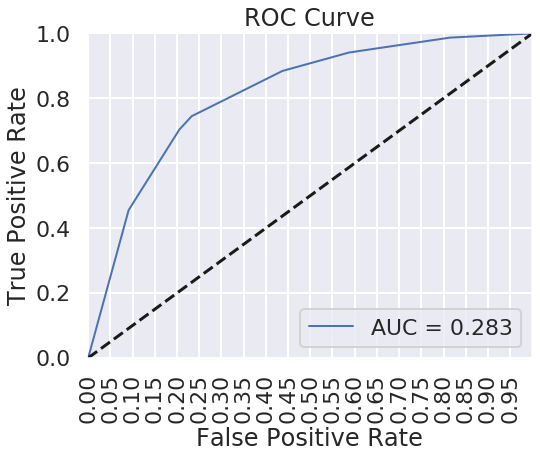

In [0]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

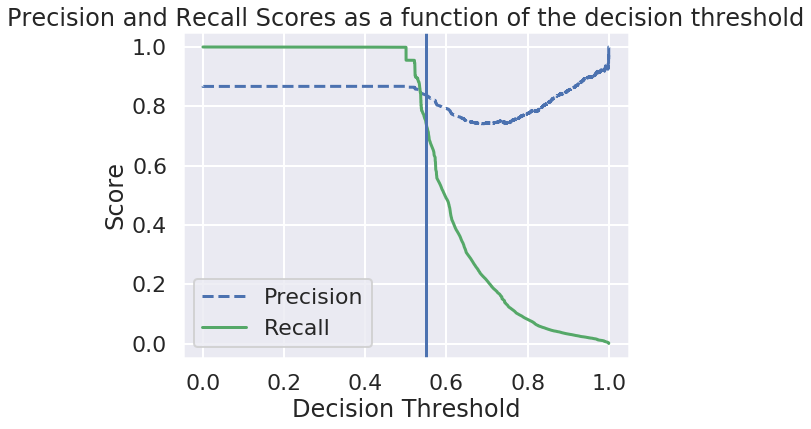

In [0]:
def adjusted_classes(pred_prob, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in pred_prob]
def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    pred_adj = adjusted_classes(lr_pred_prb, t)
    tn, fp, fn, tp = confusion_matrix(ytest, pred_adj).ravel()
    print(pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"]))
    
    print("\n Accuracy: ",(tp+tn)/(tn+fp+fn+tp)*100)
    
    # plot the curve
    plt.figure(figsize=(8,6))
    plt.title("Precision and Recall curve at current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([-0.01, 1.01]);
    plt.xlim([-0.01, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds,line=0.5):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 6))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.axvline(x=line)
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
p , r , thresholds = precision_recall_curve(ytest,pred_prb)
plot_precision_recall_vs_threshold(p,r,thresholds,line=0.55)

## Decision Trees

In [0]:
clf_dt = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [0]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb=clf_dt.predict_proba(xtest)[:,1]

In [0]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))

Accuracy: 0.8803166666666666


In [0]:
print(classification_report(ytest,dt_pred))

             precision    recall  f1-score   support

          0       0.69      0.19      0.29      7982
          1       0.89      0.99      0.93     52018

avg / total       0.86      0.88      0.85     60000



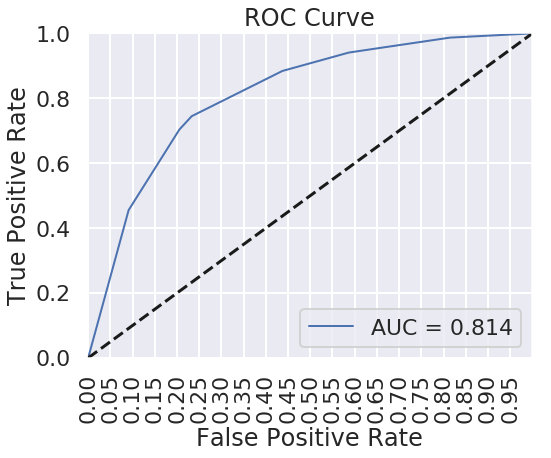

In [0]:
sns.set_context('poster')
auc_dt=roc_auc_score(ytest,dt_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,dt_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_dt)

In [0]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [0]:
dot_data = StringIO()

In [0]:
export_graphviz(clf_dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=list(X.columns))

In [0]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

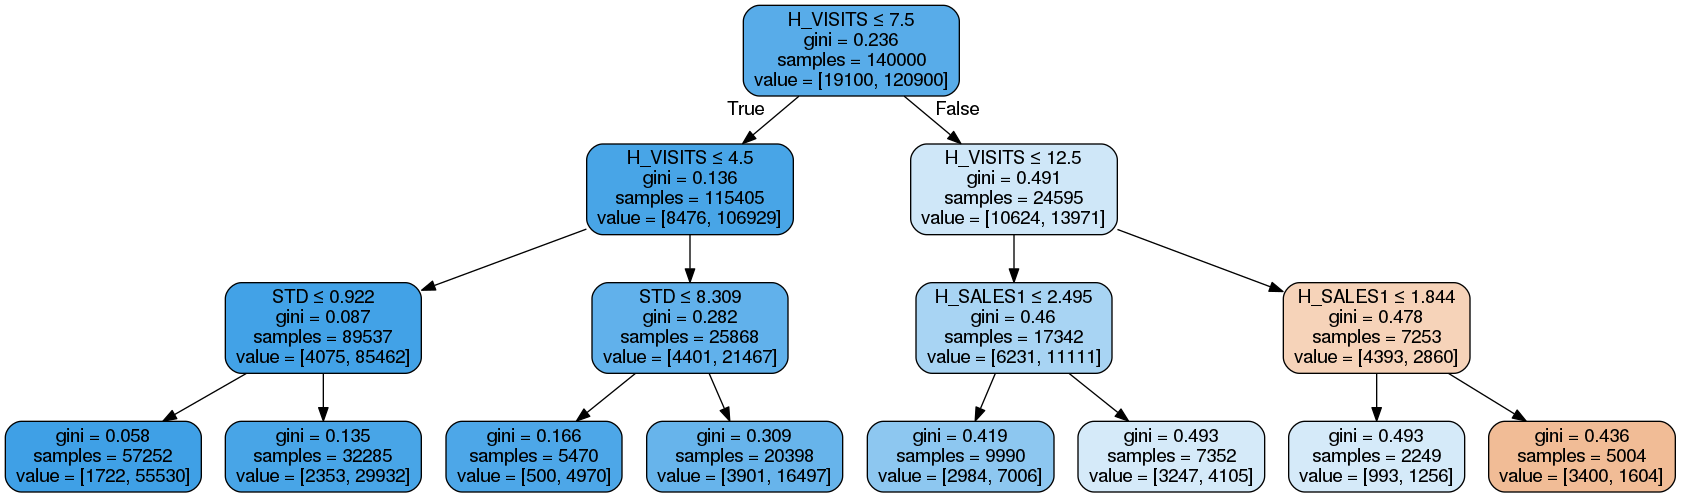

In [0]:
Image(graph.create_png())

In [0]:
features_tuple=list(zip(X.columns,clf_dt.feature_importances_))

In [0]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [0]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

In [0]:
~(feature_imp==0) 

,Feature Names,Importance
3,True,True
23,True,True
5,True,True
0,True,False
29,True,False
22,True,False
24,True,False
25,True,False
26,True,False
27,True,False


Text(0.5,1,'Decision Classifier - Features Importance')

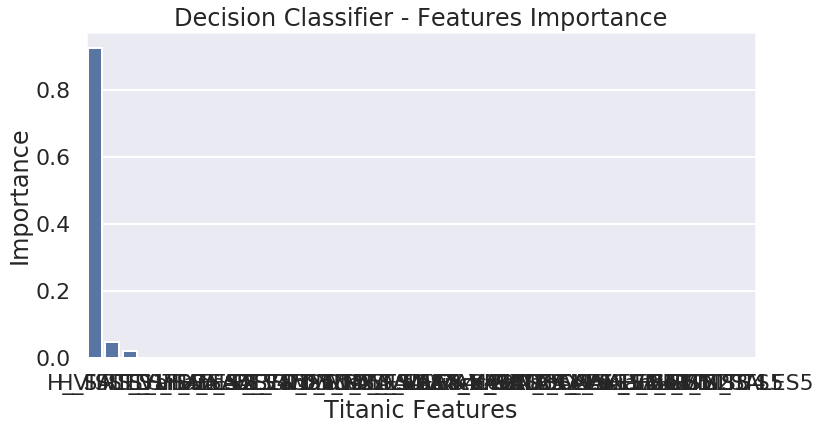

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='b')
plt.xlabel("Titanic Features")
plt.ylabel("Importance")
plt.title("Decision Classifier - Features Importance")